In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
% matplotlib notebook

In [41]:
from sklearn.datasets import load_boston

data_cancer = load_boston()
X = data_cancer['data']
y = data_cancer['target']

print list(data_cancer['feature_names'])
''':Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
'''

print len(X)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
506


<IPython.core.display.Javascript object>


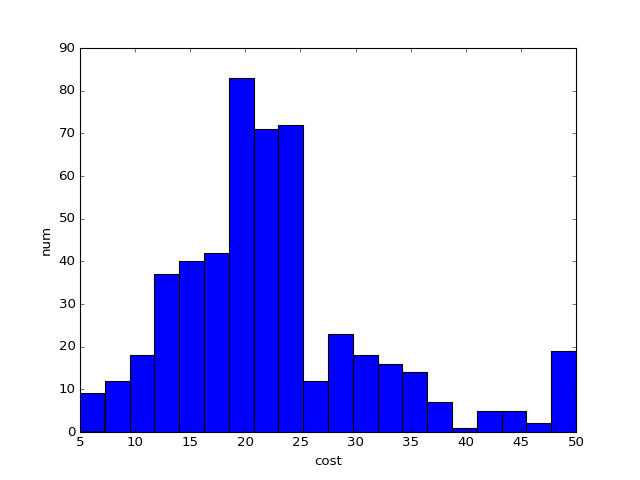

In [42]:
fig = plt.figure('prices_hist')
plt.hist(y, bins=20)
plt.xlabel('cost')
plt.ylabel('num')

In [5]:
X_train = X[:int(0.75*len(X))]
X_test = X[int(0.75*len(X)):]

y_train = y[:int(0.75*len(y))]
y_test = y[int(0.75*len(y)):]

In [52]:
from tqdm import tqdm
import numpy as np

score = []
for k in tqdm(range(75)):
    KNN_classifier = KNeighborsRegressor(n_neighbors=k+1, n_jobs=-1)
    KNN_classifier.fit(X_train, y_train)
    y_pred = KNN_classifier.predict(X_test)
    score.append(np.sqrt(mean_squared_error(y_pred, y_test)))

100%|██████████| 75/75 [00:10<00:00,  6.84it/s]


<IPython.core.display.Javascript object>


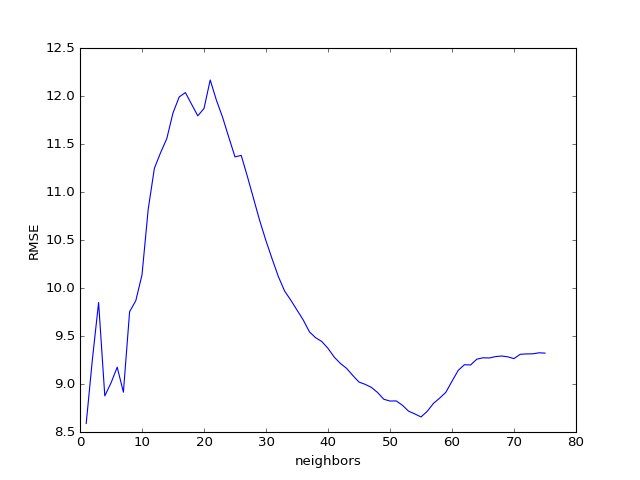

In [53]:
fig = plt.figure('RMSE')
plt.plot(range(1, len(score)+1), score)
plt.xlabel('neighbors')
plt.ylabel('RMSE')

fig.savefig('KNN RMSE.png')